In [1]:
import numpy as np
import numpy.random as rng
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns
sns.set()

In [2]:
# gero dados
y = rng.standard_normal(100)

In [64]:
m = 10000
beta = 0.1
K = np.empty(m)
theta = np.zeros((m,2))
k0 = 1
theta0 = rng.standard_cauchy(2)

K[0] = k0
theta[0] = theta0
for i in range(1,m):
  b = rng.uniform()
  if b<beta: # reversible jump
    # movendo do modelo univariado para o bivariado
    if K[i-1] == 1:
      u = rng.standard_cauchy()
      # calcular G
      theta0[0] = theta[i-1][0]
      theta0[1] = u
      # calcular MH acc
      log_alpha = -0.5*np.dot(theta0,theta0) + 0.5 * theta0[0]**2 - np.log(stats.cauchy.pdf(theta0[1]))
      if np.log(rng.uniform()) < log_alpha:
        theta[i] = theta0
        K[i] = 2
      else:
        theta[i][0] = theta0[0]
        K[i] = 1

    else: # movendo do modelo bivariado para o univariado
      # calcular G
      theta0[0] = theta[i-1][0]
      u = theta[i-1][1]
      # calcular MH acc
      log_alpha = - 0.5 * theta0[0]**2 + np.log(stats.cauchy.pdf(u)) + 0.5*np.dot(theta[i-1],theta[i-1])
      if np.log(rng.uniform()) < log_alpha:
        theta[i][0] = theta0[0]
        K[i] = 1
      else:
        theta[i] = theta0
        K[i] = 2

  else:
    if K[i-1] == 1:
      theta0[0] = theta[i-1][0] + 0.3 * rng.standard_normal()
      log_alpha = -0.5*theta0[0]**2 + 0.5 * theta[i-1][0]**2
      if np.log(rng.uniform()) < log_alpha:
        theta[i] = theta0
        K[i] = K[i-1]
      else:
        theta[i] = theta[i-1]
        K[i] = K[i-1]
      
    else:
      theta0 = theta[i-1] + 0.3 * rng.standard_normal(2)
      log_alpha = -0.5*np.dot(theta0,theta0) + 0.5 * np.dot(theta[i-1],theta[i-1])
      if np.log(rng.uniform()) < log_alpha:
        theta[i] = theta0
        K[i] = K[i-1]
      else:
        theta[i] = theta[i-1]
        K[i] = K[i-1]



In [65]:
theta

array([[-0.19794495,  0.5295852 ],
       [-0.16766134,  0.5295852 ],
       [-0.50066743,  0.5295852 ],
       ...,
       [ 0.1567079 ,  2.22930247],
       [-0.48780403,  1.96499383],
       [-0.10123309,  2.20867164]])

In [66]:
np.sum(K==2)

7406

In [67]:
np.sum(K==2)/np.sum(K==1)

2.8550501156515034

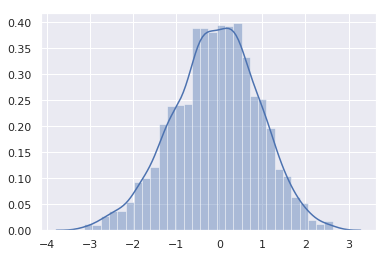

In [68]:
t = theta[K==1]
sns.distplot(t[:,0])
# sns.distplot(t[:,1])

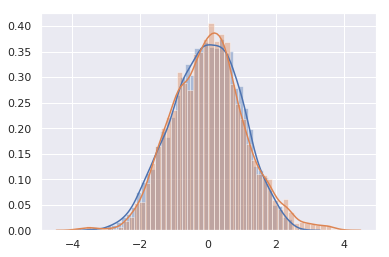

In [70]:
t = theta[K==2]
sns.distplot(t[:,0])
sns.distplot(t[:,1])

array([False, False, False, ...,  True,  True,  True])